In [1]:
import pandas as pd
import bs4
import urllib

In [2]:
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import os

In [3]:
f = open("Mark transcript.txt", 'r')
text=f.read()

In [4]:
text

'ï»¿Desktop to web to phones, from text to photos to video. But this isnâ€™t the end of the line. The next platform and medium will be even more immersive, an embodied internet where youâ€™re in the experience, not just looking at it, and we call this the metaverse. And youâ€™re going to be able to do almost anything you can imagine, get together with friends and family, work, learn, play, shop, create as well as entirely new categories that donâ€™t really fit how we think about computers or phones today. Now, since weâ€™re doing this remotely today, I figured letâ€™s make this special.\n \nSo weâ€™ve put together something that I think is really going to give you a feeling for what this future could be like. We believe the metaverse will be the successor to the mobile internet. Weâ€™ll be able to feel present like weâ€™re right there with people no matter how far apart we actually are. Weâ€™ll be able to express ourselves in new, joyful, completely immersive ways and thatâ€™s to unloc

In [5]:
expression = "[^a-zA-Z0-9 ]"
cleantextCAP = re.sub(expression, '', text)
cleantext = cleantextCAP.lower()

In [6]:
text_file = open("OutputMark.txt", "w")
text_file.write(str(cleantext))
text_file.close()

In [7]:
dat = list(cleantext.split())
dict1 = {}
for i in range(len(dat)):
    print(i)
    word = dat[i]
    dict1[word] = dat.count(word)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [8]:
keys = list(dict1)
filtered_words = [word for word in keys if word not in stopwords.words('english')]
dict2  = dict((k, dict1[k]) for k in filtered_words if k in filtered_words)

print(filtered_words)

['desktop', 'web', 'phones', 'text', 'photos', 'video', 'isnt', 'end', 'line', 'next', 'platform', 'medium', 'even', 'immersive', 'embodied', 'internet', 'youre', 'experience', 'looking', 'call', 'metaverse', 'going', 'able', 'almost', 'anything', 'imagine', 'get', 'together', 'friends', 'family', 'work', 'learn', 'play', 'shop', 'create', 'well', 'entirely', 'new', 'categories', 'dont', 'really', 'fit', 'think', 'computers', 'today', 'since', 'remotely', 'figured', 'lets', 'make', 'special', 'weve', 'put', 'something', 'give', 'feeling', 'future', 'could', 'like', 'believe', 'successor', 'mobile', 'feel', 'present', 'right', 'people', 'matter', 'far', 'apart', 'actually', 'express', 'joyful', 'completely', 'ways', 'thats', 'unlock', 'lot', 'amazing', 'experiences', 'send', 'parents', 'kids', 'theyre', 'moment', 'us', 'peering', 'little', 'window', 'game', 'youll', 'different', 'world', 'computer', 'meeting', 'itll', 'room', 'making', 'eye', 'contact', 'shared', 'sense', 'space', 'grid

In [87]:
def SequenceSelection(dictionary, length, startindex = 0):
    lengthDict = len(dictionary)
    if length > lengthDict:
        return print("length is longer than dictionary length");
    else:
        d = dictionary
        items = [(v, k) for k, v in d.items()]
        items.sort()
        items.reverse()   
        itemsOut = [(k, v) for v, k in items]
    
        highest = itemsOut[startindex:startindex + length]
        dd = dict(highest)
        wanted_keys = dd.keys()
        dictshow = dict((k, d[k]) for k in wanted_keys if k in d)

        return dictshow;

In [88]:
dictshow = SequenceSelection(dictionary = dict2, length = 20, startindex = 0)

lastDictionary = {k:dictshow[k] for k in dictshow if len(k)>=4}

print(lastDictionary)

{'going': 35, 'metaverse': 23, 'youre': 20, 'people': 18, 'able': 17, 'like': 16, 'experiences': 15, 'different': 14, 'together': 11, 'youll': 10, 'world': 10, 'today': 10, 'home': 10, 'horizon': 9, 'want': 8, 'thats': 8, 'physical': 8, 'make': 8}


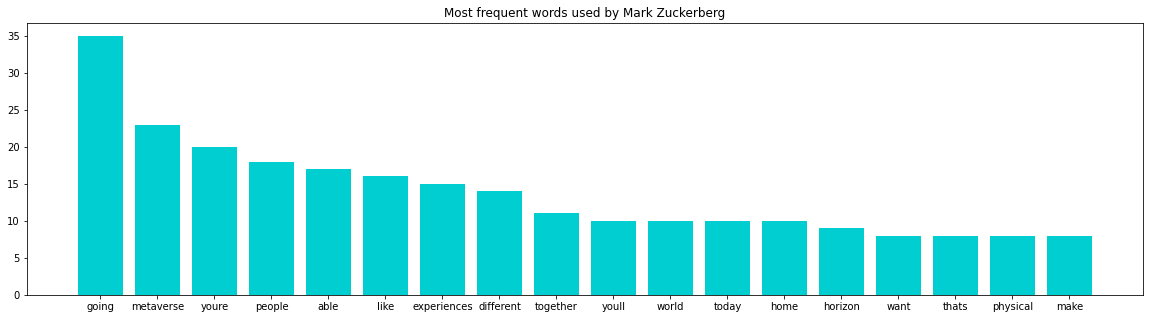

In [89]:
n = range(len(lastDictionary))
width1 = 20
height1 = 5
width_height_1 = (width1, height1)
plt.figure(figsize=width_height_1)

plt.bar(n, lastDictionary.values(), align ='center', color = 'darkturquoise')
plt.xticks(n, lastDictionary.keys())
plt.title("Most frequent words used by Mark Zuckerberg")
plt.savefig("FrequentWords-Zuckerberg.png", transparent=True)


In [90]:
from os import path
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [91]:
from wordcloud import WordCloud, STOPWORDS

<Figure size 432x288 with 0 Axes>

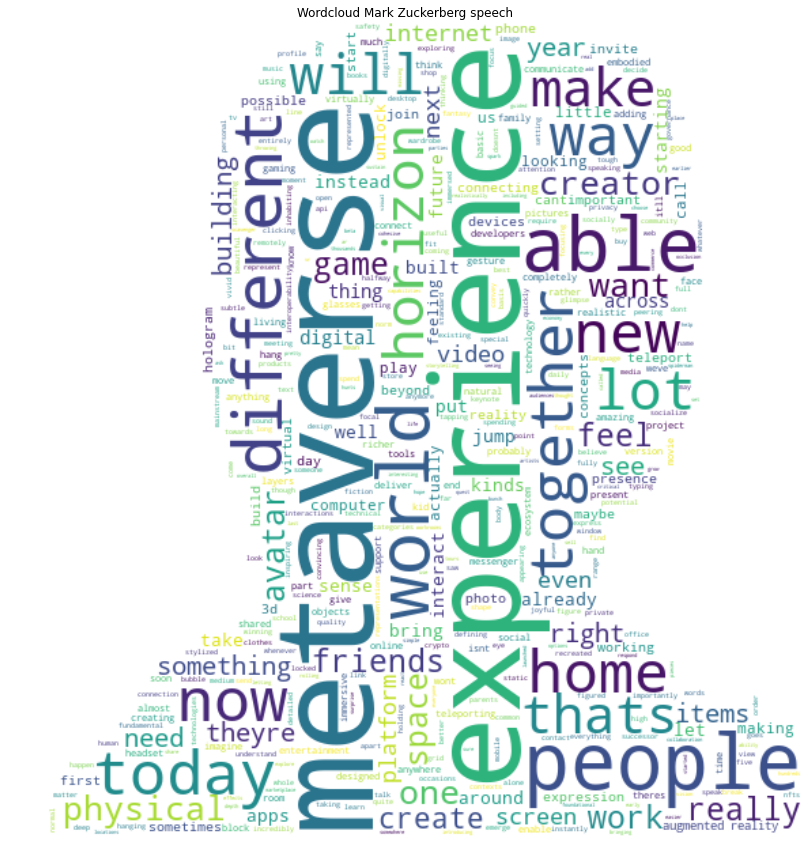

In [94]:
root_path = os.getcwd()

with open(os.path.join(root_path, 'OutputMark.txt'), 'r', errors='ignore') as output_file:
    text = output_file.readlines()
    
Mark_face = np.array(Image.open(path.join(root_path, "Mark_face6.jpg")))

stopwords = set(STOPWORDS)
stopwords.add("going")
stopwords.add("youre")
stopwords.add("youll")

wc = WordCloud(max_words=700, 
               stopwords=stopwords, mask=Mark_face, mode='RGBA', background_color= "white", max_font_size=100, width=Mark_face.shape[1],
               height=Mark_face.shape[0])

wc.generate(text[0])

wc.to_file(path.join(root_path, "Zuckerberg.png"))

plt.figure()
plt.figure(figsize=width_height_1)
width1 = 15
height1 = 15
width_height_1 = (width1, height1)
title = "Wordcloud Mark Zuckerberg speech"
plt.title(title)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.imshow(wc,cmap=plt.cm.gray, interpolation='bilinear')

In [93]:
from textblob import TextBlob

sentiment = TextBlob(cleantext)
print("Sentiment Score: ", sentiment.sentiment.polarity)

Sentiment Score:  0.1634718044040078
